<a href="https://colab.research.google.com/github/BongaManganye/Datathon-2022/blob/main/Spotify_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Top 10 Most popular tracks
*Top 10 tracks by Dancebility
*Top 10 tracks by Tempo
*Top 5 artists by Streams
*Streams over Time

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
sns.set_style("darkgrid")

**Load Dataset**

In [3]:
drive.mount('/content/drive')

# Specify the path to your CSV file in your Google Drive
file_path = '/content/drive/My Drive/Spotify Most Streamed Songs2.csv'

# Load the CSV file
df = pd.read_csv('/content/drive/My Drive/Spotify Most Streamed Songs2.csv')
print(df)
df.head()

Mounted at /content/drive
                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  r

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


### **Data Cleaning**

In [4]:
df.isna().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [6]:
df.shape

(953, 25)

In [7]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')

In [8]:
len(df.columns)

25

In [9]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.135979e+08,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668039e+08,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.413817e+08,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.902286e+08,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


### **Data Analysis**

**Top 5 artists by Streams**

In [10]:
top_five_artists = df.groupby("artist(s)_name").count().sort_values(by="track_name", ascending=False)["track_name"][:5]
top_five_artists

,track_name
artist(s)_name,
Taylor Swift,34
The Weeknd,22
SZA,19
Bad Bunny,19
Harry Styles,17


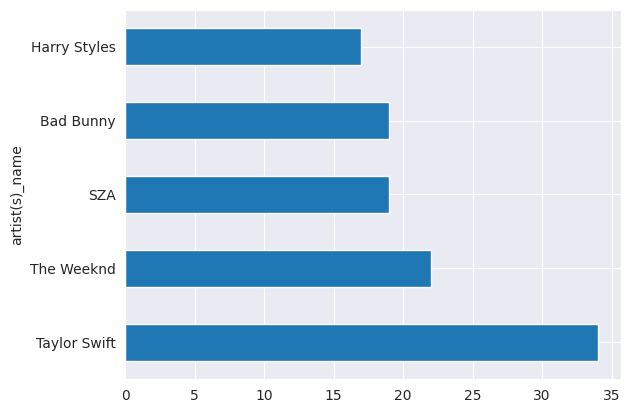

In [11]:
top_five_artists.plot.barh()
plt.show()

# **To 10 Danceability Tracks**

In [12]:
Top_ten_danceability_tracks = df[["danceability_%","track_name"]].sort_values(by="danceability_%",ascending=False)[:10]
Top_ten_danceability_tracks

,danceability_%,track_name
595,96,Peru
224,95,Players
250,95,The Real Slim Shady
423,95,Super Freaky Girl
702,95,Starlight
321,95,CAIRO
876,95,Ai Preto
268,94,Slut Me Out
943,93,Privileged Rappers
142,93,"Gol Bolinha, Gol Quadrado 2"


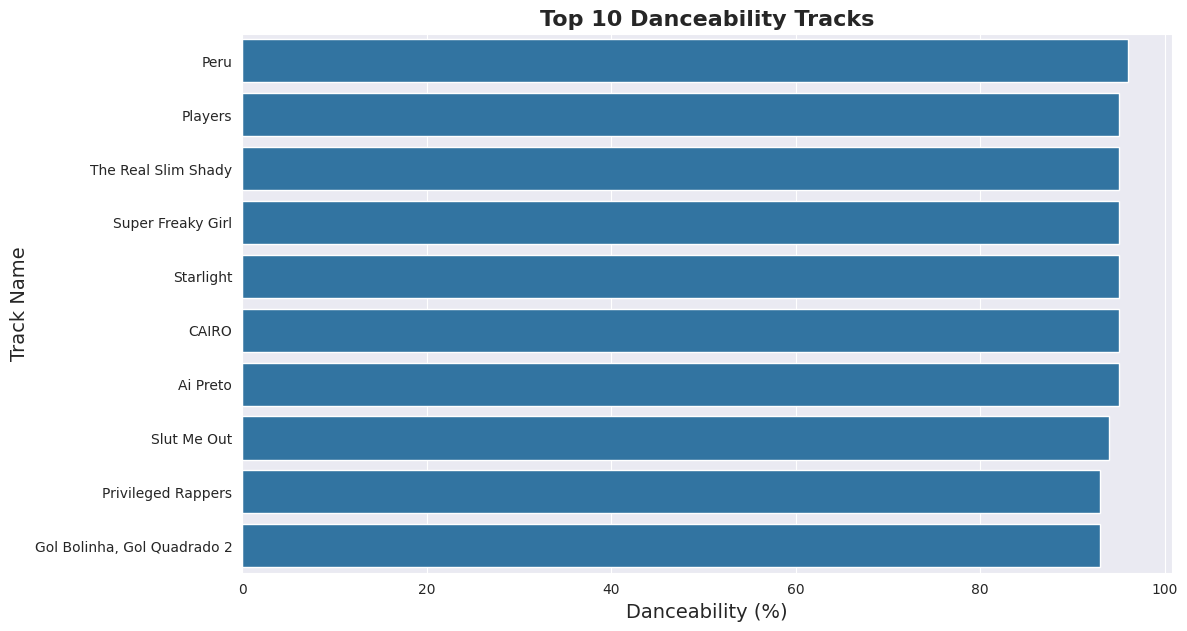

In [36]:
plt.figure(figsize=(12, 7))
sns.barplot(x="danceability_%",y="track_name",data=Top_ten_danceability_tracks)
plt.title("Top 10 Danceability Tracks", fontweight="bold", fontsize=16)
plt.xlabel("Danceability (%)", fontsize=14)
plt.ylabel("Track Name",fontsize=14)
plt.show()

# **Top 10 Most popular tracks**

In [14]:
Top_ten_most_popular_tracks = df[["streams","track_name"]].sort_values(by="streams",ascending=False)[:10]
Top_ten_most_popular_tracks

,streams,track_name
55,3703895074,Blinding Lights
179,3562543890,Shape of You
86,2887241814,Someone You Loved
620,2864791672,Dance Monkey
41,2808096550,Sunflower - Spider-Man: Into the Spider-Verse
162,2713922350,One Dance
84,2665343922,STAY (with Justin Bieber)
140,2594040133,Believer
725,2591224264,Closer
48,2565529693,Starboy


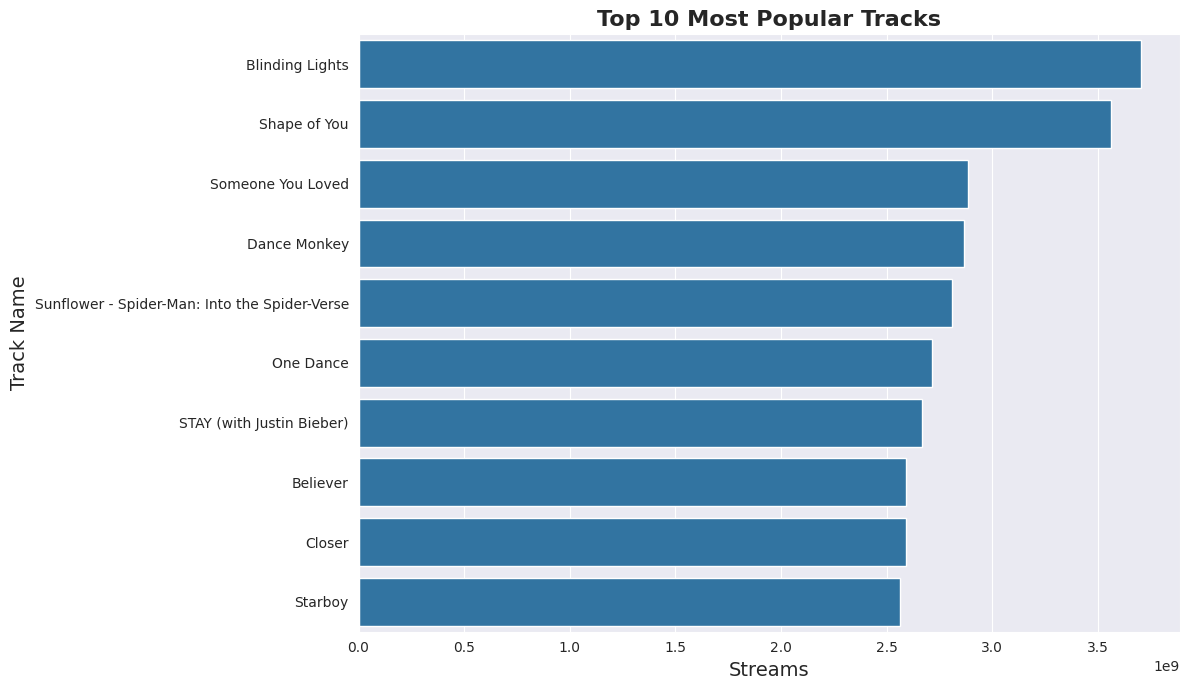

In [26]:
plt.figure(figsize=(12, 7))

# Create a horizontal barplot
sns.barplot(x="streams", y="track_name", data=Top_ten_most_popular_tracks, orient="h")

# Add a title
plt.title("Top 10 Most Popular Tracks", fontsize=16, fontweight="bold")

# Add labels to the axes
plt.xlabel("Streams", fontsize=14)
plt.ylabel("Track Name", fontsize=14)
# Show the plot
plt.tight_layout()
plt.show()

# **Top 5 artists by Streams**

In [16]:
Top_five_instrumental_tracks = df[["artist(s)_name","streams"]].sort_values(by="streams",ascending=False)[:5]
Top_five_instrumental_tracks

,artist(s)_name,streams
55,The Weeknd,3703895074
179,Ed Sheeran,3562543890
86,Lewis Capaldi,2887241814
620,Tones and I,2864791672
41,"Post Malone, Swae Lee",2808096550


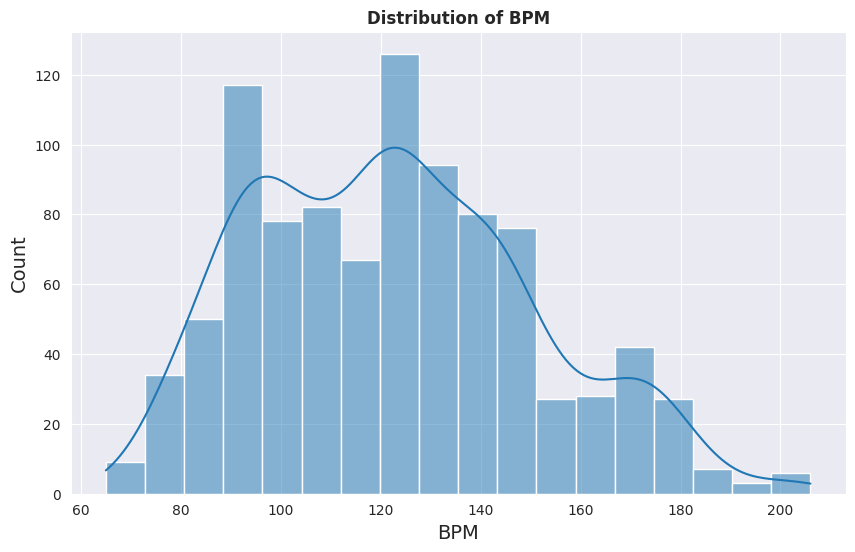

In [32]:
# prompt: create a graph of the distribution of BPM

plt.figure(figsize=(10, 6))
sns.histplot(df['bpm'], kde=True)  # Use histplot for distribution
plt.title('Distribution of BPM', fontweight="bold")
plt.xlabel('BPM', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

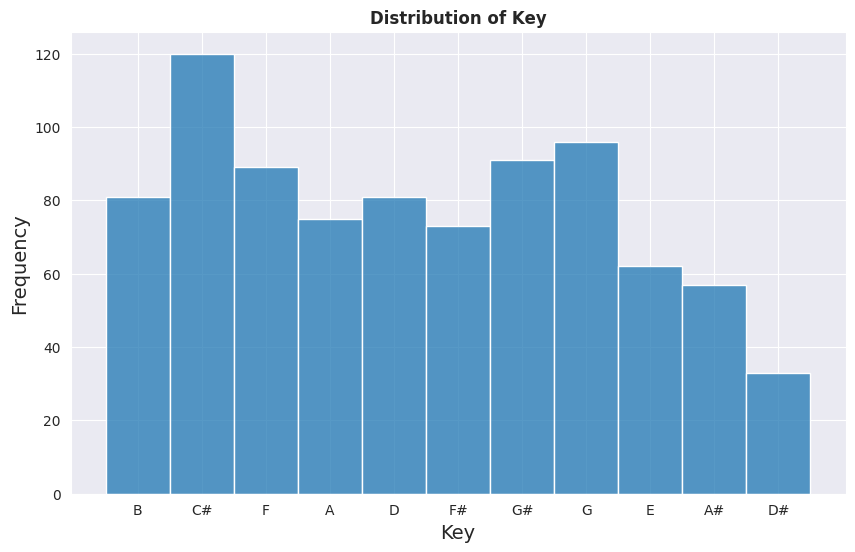

In [33]:
# prompt: Create a graph of the distribution of Key without the line

plt.figure(figsize=(10, 6))
sns.histplot(df['key'], kde=False)  # Set kde=False to remove the line
plt.title('Distribution of Key', fontweight="bold")
plt.xlabel('Key', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

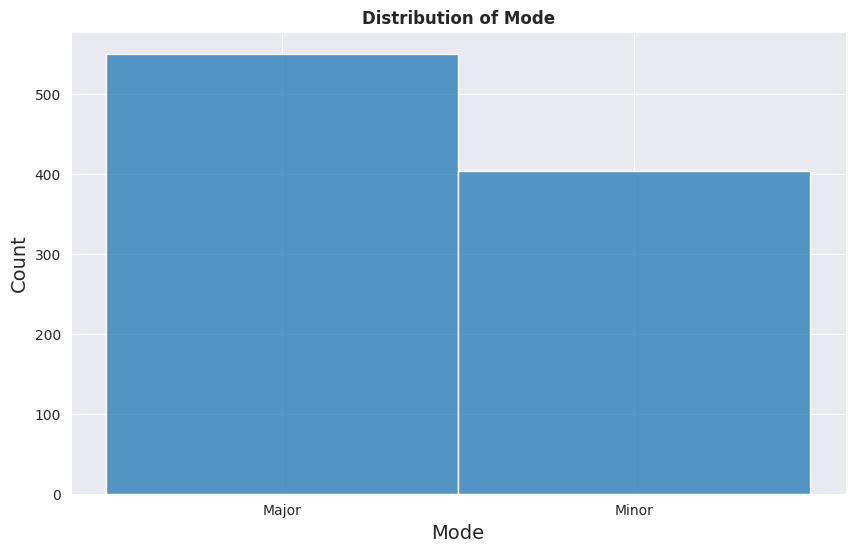

In [34]:
# prompt: Create a graph of the distribution of mode without line

plt.figure(figsize=(10, 6))
sns.histplot(df['mode'], kde=False)  # Set kde=False to remove the line
plt.title('Distribution of Mode',fontweight="bold")
plt.xlabel('Mode', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

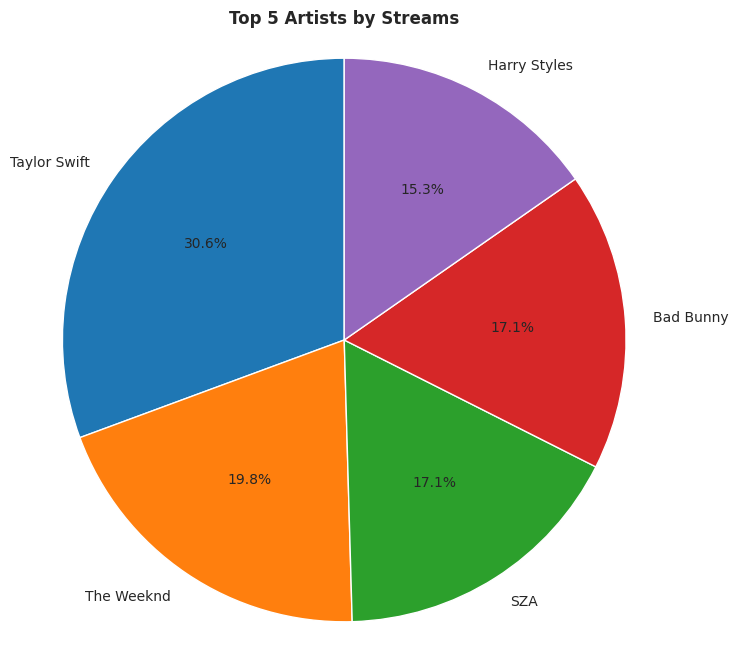

In [30]:


plt.figure(figsize=(8, 8))
plt.pie(top_five_artists, labels=top_five_artists.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Artists by Streams',fontweight="bold")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

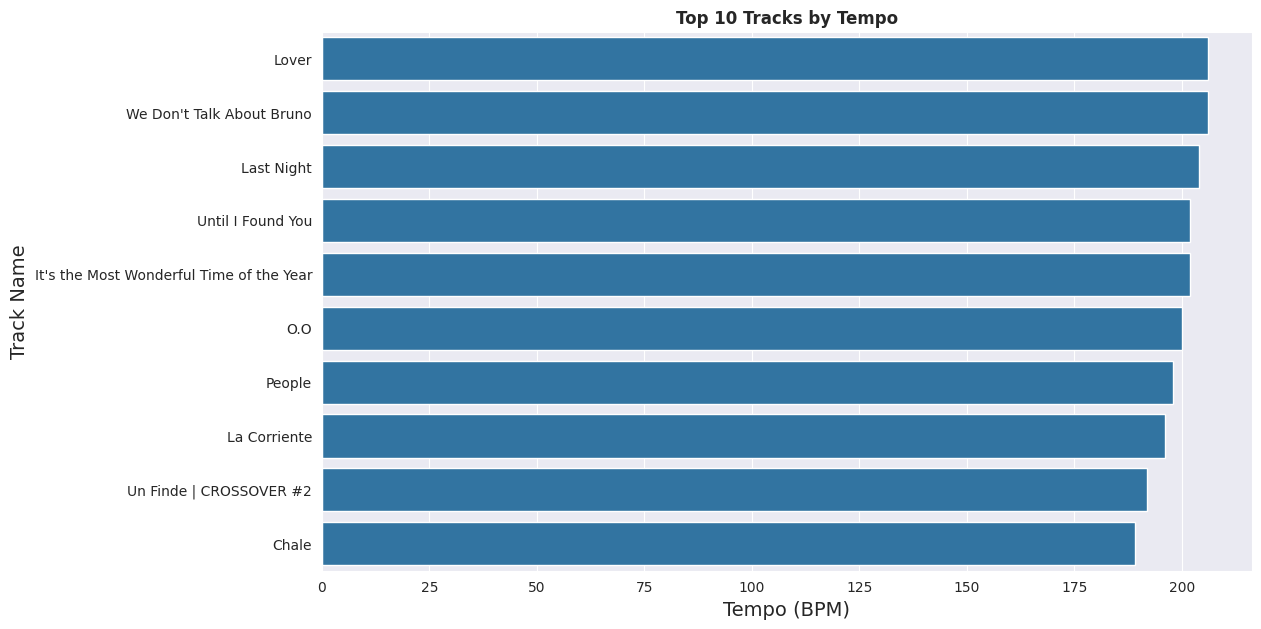

In [35]:
# prompt: create a  graph for Top 10 tracks by tempo

# Assuming 'df' is your DataFrame as defined in the previous code.
Top_ten_tempo_tracks = df[["bpm","track_name"]].sort_values(by="bpm",ascending=False)[:10]

plt.figure(figsize=(12, 7))
sns.barplot(x="bpm", y="track_name", data=Top_ten_tempo_tracks)
plt.title("Top 10 Tracks by Tempo", fontweight="bold")
plt.xlabel("Tempo (BPM)", fontsize=14)
plt.ylabel("Track Name", fontsize=14)
plt.show()